In [1]:
# Auto reload local files
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
# Make files in src/ available to notebook
import sys
if '../src' not in sys.path:
    sys.path.insert(0, '../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

# Suppress ta warnings
import warnings
warnings.filterwarnings("ignore")

import datastore as ds
from technical_signals import TechnicalSignalSet
import util

## Configuration

In [2]:
# Read SPY csv, define config
watchlist = list(pd.read_csv('../data/watchlist.csv', header=0)['symbol'])
spy_constituents = list(pd.read_csv('../../data/spy_constituents.csv', header=0)['Symbol'])
all_known_tickers = list(pd.read_csv('../../data/all_known_tickers.csv', header=None)[0])
random.shuffle(all_known_tickers)

tickers = watchlist + spy_constituents + all_known_tickers[:1000]
start_date = "2000-01-01"
end_date = "2025-01-01"
predict_window = 14

## Download Candlesticks

In [3]:
ds.download_daily_candlesticks(tickers, start_date, end_date)

Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ANTM


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for BLL


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Date'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/sit

Error downloading daily candlesticks for BRK.B


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Date'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/sit

Error downloading daily candlesticks for BF.B


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CERN


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for DISCA


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for DISCK


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for INFO


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for KSU


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for PBCT


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for VIAC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for WLTW


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for XLNX


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for FTSI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for TOT


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for TSU


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for VMM


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for FI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CAI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for RST


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for TPRE


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CZZ


Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 128, in download_daily_candlesticks
    db.daily_samples.insert_many(data.to_dict("records"), ordered=False)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pymongo/_csot.py", line 105, in csot_wrapper
    return func(self, *args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pymongo/collection.py", line 707, in insert_many
    blk.execute(write_concern, session=session)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pymongo/bulk.py", line 513, in execute
    return self.execute_command(generator, write_concern, session)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pymongo/bulk.py", line 391, in execute_command
    client._retry_with_ses

Error downloading daily candlesticks for JE


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for FCAU


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for FVAC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GRAM


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CRHM


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for AT


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for AXO


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ADSW


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for IHC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for DSE


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for NYV


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GRUB


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for HKIB


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for WPF


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for XAN


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for KNL


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for MNK


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GV


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GTT


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CTK


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CFXA


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for BAF


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for PCI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for NWHM


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for EROS


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for PIC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for LGVW


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GTS


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for DL


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CVU


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for TLI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for SFUN


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for PFNX


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ARD


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for TREC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for BCEI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GIX~


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for IID


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for COG


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for BDR


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ELJ


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CCXX


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GIX


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for MSGN


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CSPR


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for BSA


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for HFC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for RLH


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for RVI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for LB


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for IRR


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for COR


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for BBX


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for SHLL


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for SNR


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GSB


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for LDL


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for OSB


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for RYB


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CHA


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for FIT


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for DTQ


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for SAND          


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for SOGO


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CPLG


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CCC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for SPB           


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for IPOB


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for THGA


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for DPW


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for SPAQ


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for LGC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ANH


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for FLY


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CLI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for MFL


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CIT


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for VEDL


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for FFG


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CNXM


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for PER


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for DNI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for RPLA


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for WRI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for JWS


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for MCF


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ETX           


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ANTM


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for OAC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CFX


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CRY


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GGO


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CTL


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for WTRU


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for MBT


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ECC           


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for NTN


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Date'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/sit

Error downloading daily candlesticks for NTEST


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for QEP


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ROYT


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for DUC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for PLT


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for NNA


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for HRC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for SPN


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for WPG


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for MYF


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Date'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/sit

Error downloading daily candlesticks for IBO


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GEN           


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CBB


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for UFS


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for MVC


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ONDK


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for MUS


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for BQH


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for ACY


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for CVA


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GPM


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for FSKR


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Date'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/sit

Error downloading daily candlesticks for SCA


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for MR


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for RPAI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Date'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/sit

Error downloading daily candlesticks for EAI


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for GSH


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

Error downloading daily candlesticks for SOAC
Error downloading daily candlesticks for BFY


Traceback (most recent call last):
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/yahoo/daily.py", line 153, in _read_one_data
    data = j["context"]["dispatcher"]["stores"]["HistoricalPriceStore"]
KeyError: 'HistoricalPriceStore'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jared/workspace/market-diff/stock-prediction/notebooks/../src/datastore.py", line 106, in download_daily_candlesticks
    data = pdr.DataReader(
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas/util/_decorators.py", line 207, in wrapper
    return func(*args, **kwargs)
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10/site-packages/pandas_datareader/data.py", line 379, in DataReader
    ).read()
  File "/home/jared/.local/share/virtualenvs/stock-prediction-MOS0QyR2/lib/python3.10

## Process Candlesticks into Signals

In [4]:
candlesticks = ds.get_daily_candlesticks(tickers, start_date, end_date)

Xs = []
ys = []

for ticker in tickers:
    try:
        technical_sigs = TechnicalSignalSet(candlesticks[ticker], predict_window)
        X, y, Xy_date = technical_sigs.to_xy()
        Xs.append(X)
        ys.append(y)
    except Exception as ex:
        print(f"Exception on {ticker}:")
        print(ex)

X = np.concatenate(Xs, axis=0)
y = np.concatenate(ys, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

Exception on BRK.B:
'high'
Exception on BF.B:
'high'
Exception on DISCA:
'high'
Exception on DISCK:
'high'
Exception on INFO:
'high'
Exception on KSU:
'high'
Exception on OGN:
Found array with 0 sample(s) (shape=(0, 58)) while a minimum of 1 is required by StandardScaler.
Exception on PBCT:
'high'
Exception on VIAC:
'high'
Exception on WLTW:
'high'
Exception on XLNX:
'high'
Exception on FTSI:
'high'
Exception on TOT:
'high'
Exception on TSU:
'high'
Exception on VMM:
'high'
Exception on FI:
'high'
Exception on CAI:
'high'
Exception on RST:
'high'
Exception on TPRE:
'high'
Exception on CZZ:
'high'
Exception on JE:
'high'
Exception on FCAU:
'high'
Exception on FVAC:
'high'
Exception on GRAM:
'high'
Exception on CRHM:
'high'
Exception on AT:
'high'
Exception on AXO:
'high'
Exception on ADSW:
'high'
Exception on IHC:
'high'
Exception on DSE:
'high'
Exception on NYV:
'high'
Exception on GRUB:
'high'
Exception on HKIB:
'high'
Exception on WPF:
'high'
Exception on XAN:
'high'
Exception on KNL:

## Process Signals for PyTorch

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import gc

batch_size = util.round_batch_size(X_train.shape[0], 1024, leeway=200)
n_features = X_train.shape[1]

# Convert X, y to torch tensors
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train.reshape(y_train.shape[0], 1)).float()
y_test_tensor = torch.from_numpy(y_test.reshape(y_test.shape[0], 1)).float()

print(X_train_tensor.shape)
print('Batch size:', batch_size)

# Generators
training_set = TensorDataset(X_train_tensor, y_train_tensor)
dataloader_train = DataLoader(training_set, shuffle=True, batch_size=batch_size)

validation_set = TensorDataset(X_test_tensor, y_test_tensor)
dataloader_test = DataLoader(validation_set, shuffle=True, batch_size=batch_size)

# Release duplicated memory
try:
    del X
    del y
    del Xs
    del ys
    #del X_train
    #del X_test
    #del y_train
    #del y_test
    del X_train_tensor
    del X_test_tensor
    del y_train_tensor
    del y_test_tensor
except:
    pass
gc.collect()

torch.Size([5282429, 58])
Batch size: 846


0

## Create or Load PyTorch Model

In [6]:
n_outputs = 1

net = nn.Sequential(
    nn.Linear(n_features, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, n_outputs),
)


# LOAD PYTORCH MODEL FROM DB (HELL YEA)
#model_env = ds.get_all_model_envs()[0]
#model = model_env.hydrate_model()
#net = model.model

## Training

In [ ]:
device = torch.device("cuda")

# Set device for model
net = net.to(device)

# Select optimizerand loss criteria
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) 

# Training the model
for epoch in range(100):
    train_loss = 0.0
    
    # Training
    net.train()
    for local_batch, local_labels in dataloader_train:
        if local_batch.shape[0] != batch_size:
            print(f"Wrong train batch size. Skipping batch.\nThrowing away {local_batch.shape[0]} samples.")
            continue
        local_batch, local_labels = local_batch.to(device), local_labels.to(device)
        
        # Forward pass: Compute predicted y by passing x to the model 
        y_pred = net(local_batch)
        # Compute and print loss 
        loss = criterion(y_pred, local_labels)
        # Zero gradients, perform a backward pass, update the weights. 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        # Update loss
        train_loss += loss.item()

    # Validation
    net.eval()
    valid_loss = 0.0
    for data, labels in dataloader_test:
        if data.shape[0] != batch_size:
            continue
        data, labels = data.to(device), labels.to(device)
        
        target = net(data)
        loss = criterion(target,labels)
        valid_loss += loss.item()

    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(dataloader_train)} \t\t Validation Loss: {valid_loss / len(dataloader_test)}')

Wrong train batch size. Skipping batch.
Throwing away 5 samples.
Epoch 1 		 Training Loss: 0.6620444710012242 		 Validation Loss: 0.7065535685936368
Wrong train batch size. Skipping batch.
Throwing away 5 samples.
Epoch 2 		 Training Loss: 0.6623072337684296 		 Validation Loss: 0.7044418658891347
Wrong train batch size. Skipping batch.
Throwing away 5 samples.
Epoch 3 		 Training Loss: 0.6619803406602388 		 Validation Loss: 0.7069947190560106
Wrong train batch size. Skipping batch.
Throwing away 5 samples.
Epoch 4 		 Training Loss: 0.6617957441304759 		 Validation Loss: 0.7041515756885331
Wrong train batch size. Skipping batch.
Throwing away 5 samples.
Epoch 5 		 Training Loss: 0.661941577559762 		 Validation Loss: 0.7044685912349666
Wrong train batch size. Skipping batch.
Throwing away 5 samples.
Epoch 6 		 Training Loss: 0.6617967525608927 		 Validation Loss: 0.7028274266190804
Wrong train batch size. Skipping batch.
Throwing away 5 samples.
Epoch 7 		 Training Loss: 0.66169821743587

## Backtest

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ticker: HLT
73 buy/sells performed - 3.3121597096188746% of the time
Stock price change: 29.347823752991246%
ROI: 21.38381093373265%
{'cash': 9357.200035095215, 'assets': 11, 'latest_price': 131.08999633789062, 'total_value': 10799.189994812012, 'roi': 0.2138381093373265}


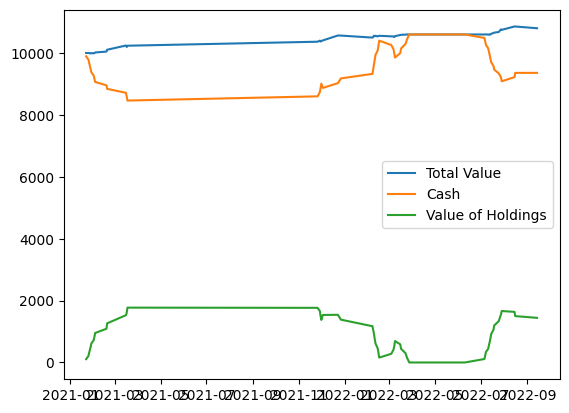

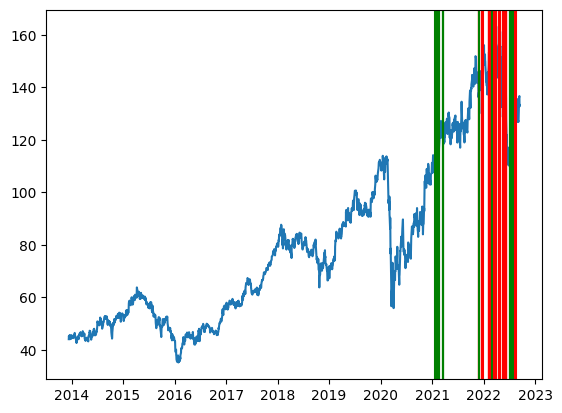

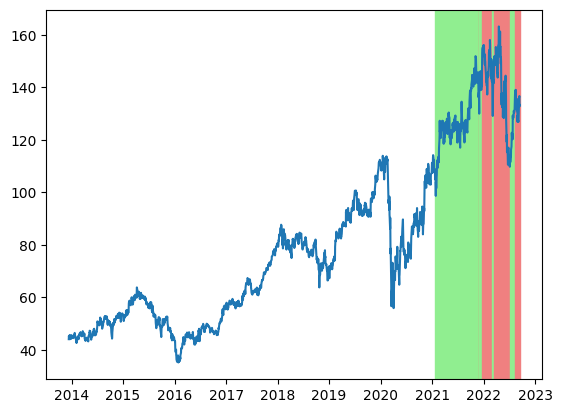

Ticker: TT
279 buy/sells performed - 4.8844537815126055% of the time
Stock price change: 139.94162108615734%
ROI: 12.874857307338425%
{'cash': 9173.951400756836, 'assets': 15, 'latest_price': 160.7899932861328, 'total_value': 11585.801300048828, 'roi': 0.12874857307338425}


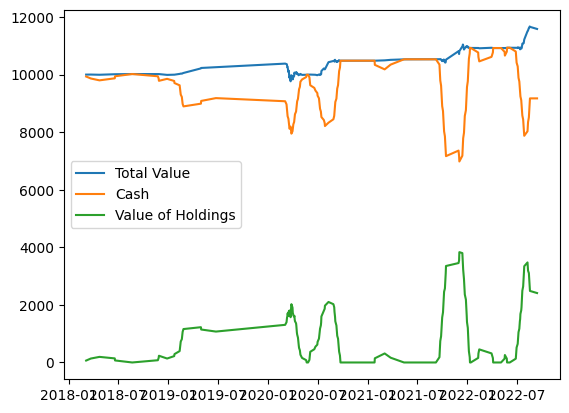

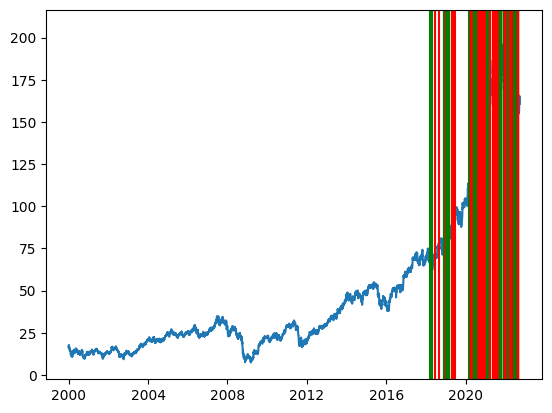

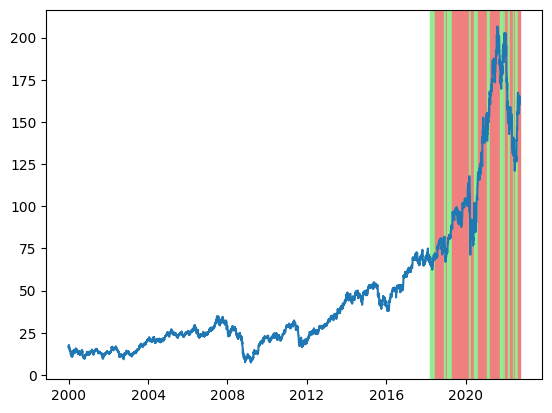

Ticker: MSFT
380 buy/sells performed - 6.652661064425771% of the time
Stock price change: 170.77914932868708%
ROI: 7.987614422620516%
{'cash': 9022.125144958496, 'assets': 11, 'latest_price': 253.52999877929688, 'total_value': 11810.955131530762, 'roi': 0.07987614422620516}


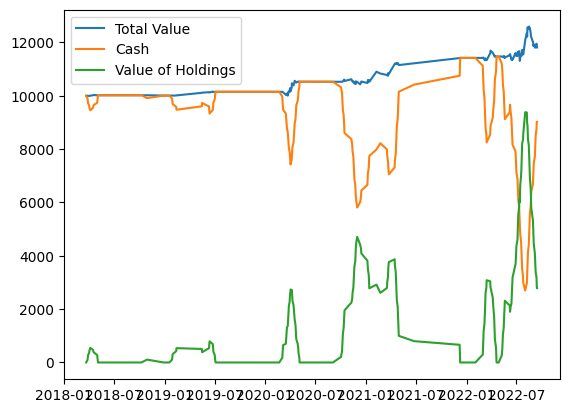

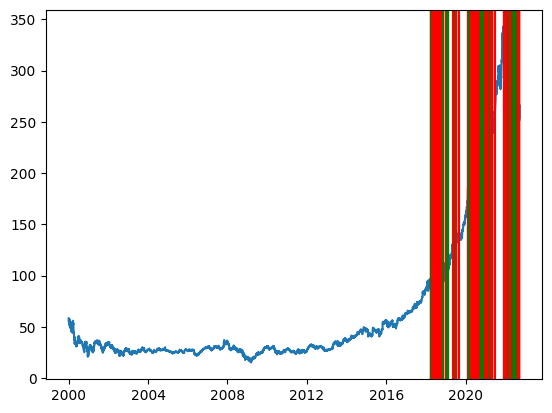

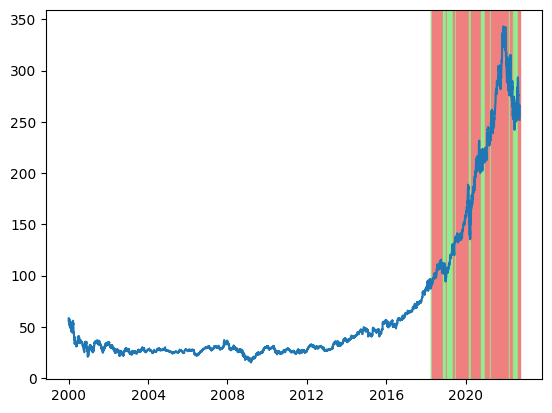

{'average_gainloss': 1398.6488087972004,
 'results': {'HLT': {'cash': 9357.200035095215,
   'assets': 11,
   'latest_price': 131.08999633789062,
   'total_value': 10799.189994812012,
   'roi': 0.2138381093373265},
  'TT': {'cash': 9173.951400756836,
   'assets': 15,
   'latest_price': 160.7899932861328,
   'total_value': 11585.801300048828,
   'roi': 0.12874857307338425},
  'MSFT': {'cash': 9022.125144958496,
   'assets': 11,
   'latest_price': 253.52999877929688,
   'total_value': 11810.955131530762,
   'roi': 0.07987614422620516}}}

In [8]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import backtest as bt
from strategy import PretrainedModelStrategy, SignalModelStrategy
from technical_signals import TechnicalSignalSet

random.shuffle(spy_constituents)

# XXX temporary - need to rework concurrency to be suitable for CUDA
# (Must use `spawn` as opposed to `fork` based concurrency I believe - separate OS processes?)
net = net.to(torch.device('cpu'))

def predict(net):
    return lambda X:\
        net(torch.from_numpy(X).float().cpu()).detach().numpy()

def df_to_signal_set(df):
    return TechnicalSignalSet(df, predict_window=predict_window)

strategy = PretrainedModelStrategy(predict(net), df_to_signal_set, cutoff=4., bias=0.)
bt.comprehensive_backtest(strategy, spy_constituents[:5], "2000-01-01", "2025-01-01", plot=True, train_test_ratio=0.8)

## Save Model

In [ ]:
from predictive_model import PredictiveModel
from datetime import datetime
from model_env import ModelEnv

net = net.to(torch.device('cpu'))

def df_to_signal_set(df):
    return TechnicalSignalSet(df, predict_window=predict_window)

model = PredictiveModel(net, "TorchMATI-1k_spy_watch-450", predict_window, datetime.now())
model.save()

model_env = ModelEnv.from_model(model, 'My First Test', [{'id': 'rsi'}], technical_sigs.X_scaler, technical_sigs.y_scaler, model_code=f"""
import torch.nn as nn

model = nn.Sequential(
    nn.Linear({n_features}, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
)
""")

ds.save_model_envs([model_env])